In [359]:
import pandas as pd

# read in the data from the 'AAPL_01.csv' file
df_aapl = pd.read_csv('AAPL_2021_price.csv')
df_aapl.rename(columns={'Date': 'date'}, inplace=True)

tag = "AAPL"
shift_number = 7

# read in the data from the 'signal_01.csv' file
df_signals = pd.read_csv('AAPL_10m_no0comm_signal.csv')

#trading day shift
df_signals['signal'] = df_signals['signal'].shift(shift_number)
# merge the signals with the data
df = pd.merge(df_aapl, df_signals, on='date')

# create a new column with the daily return of the stock
df['returns'] = (df['Adj Close'] - df['Adj Close'].shift(1)) / df['Adj Close'].shift(1)

# create a new column with the daily return of the trading strategy
df['strategy_returns'] = df['signal'] * df['returns']

# calculate the cumulative return of the trading strategy
df['cumulative_strategy_returns'] = df['strategy_returns'].cumsum()

# calculate the cumulative return of a buy-and-hold strategy
df['cumulative_buy_and_hold_returns'] = df['returns'].cumsum()

df.dropna(subset=df.columns, inplace=True, how='all', axis=0)
# print the dataframe
print(df)


           date        Open        High         Low       Close   Adj Close  \
0    2021-03-03  124.809998  125.709999  121.839996  122.059998  120.792366   
1    2021-03-04  121.750000  123.599998  118.620003  120.129997  118.882408   
2    2021-03-05  120.980003  121.940002  117.570000  121.419998  120.159004   
3    2021-03-08  120.930000  121.000000  116.209999  116.360001  115.151550   
4    2021-03-09  119.029999  122.059998  118.790001  121.089996  119.832428   
..          ...         ...         ...         ...         ...         ...   
199  2021-12-27  177.089996  180.419998  177.070007  180.330002  179.289444   
200  2021-12-28  180.160004  181.330002  178.529999  179.289993  178.255432   
201  2021-12-29  179.330002  180.630005  178.139999  179.380005  178.344925   
202  2021-12-30  179.470001  180.570007  178.089996  178.199997  177.171738   
203  2021-12-31  178.089996  179.229996  177.259995  177.570007  176.545364   

        Volume  signal   returns  strategy_returns 

In [360]:
import numpy as np
df = df.dropna(subset=df.columns)

# calculate the net profit of the trading strategy
net_profit_act = df['cumulative_strategy_returns'].iloc[-1] - df['cumulative_strategy_returns'].iloc[1]
print(f'Net profit Active: {100*net_profit_act:.2f}%')

net_profit_pas = df['cumulative_buy_and_hold_returns'].iloc[-1] - df['cumulative_buy_and_hold_returns'].iloc[1]
print(f'Net profit Passive: {100*net_profit_pas:.2f}%')

# calculate the Sharpe ratio of the trading strategy
mean_returns = df['strategy_returns'].mean()
std_returns = df['strategy_returns'].std()
sharpe_ratio = mean_returns / std_returns * np.sqrt(204)  # 252 trading days in a year
print(f'Sharpe ratio: {sharpe_ratio:.2f}')

# calculate the maximum drawdown of the trading strategy
max_cumulative_return = df['cumulative_strategy_returns'].cummax()
drawdown = (df['cumulative_strategy_returns'] - max_cumulative_return) / max_cumulative_return
max_drawdown = drawdown.min()
print(f'Maximum drawdown: {max_drawdown:.2%}')


Net profit Active: 521.80%
Net profit Passive: 38.27%
Sharpe ratio: 2.04
Maximum drawdown: -252.65%


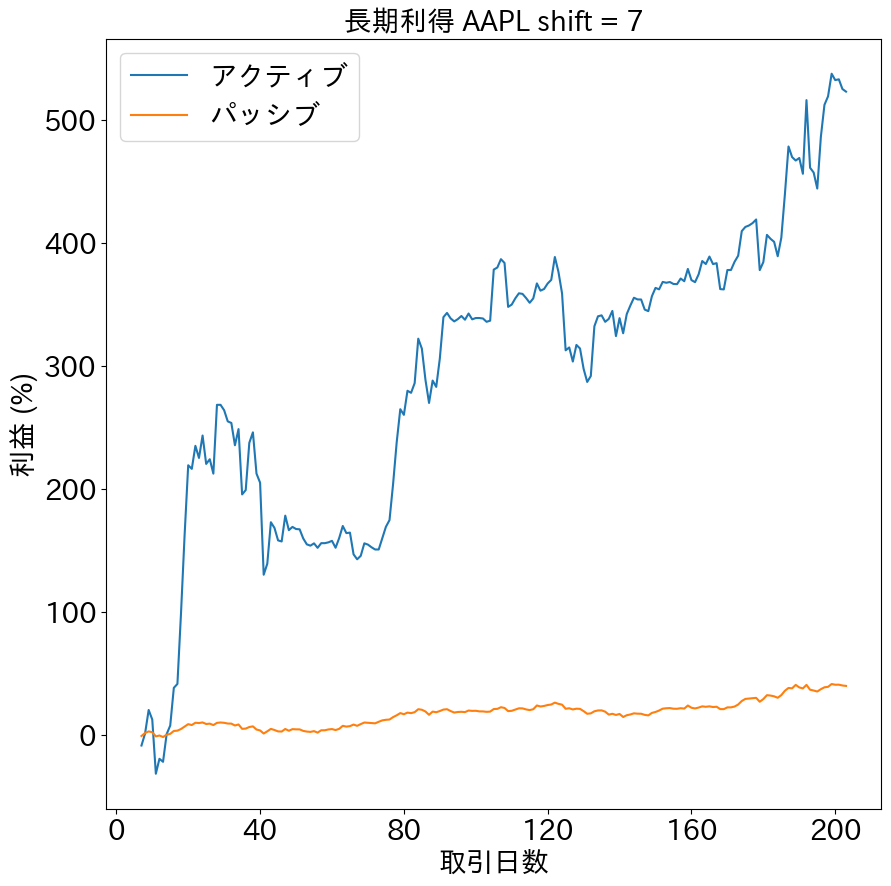

In [361]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(10, 10))

plt.xlabel("取引日数", fontsize=20) # x軸ラベル
plt.ylabel("利益 (%)", fontsize=20) # y軸ラベル

from matplotlib.ticker import MaxNLocator
plt.plot(100*df['cumulative_strategy_returns'], label='アクティブ')
plt.plot(100*df['cumulative_buy_and_hold_returns'], label='パッシブ')
plt.legend(fontsize=20)
plt.title("長期利得 " + tag + " shift = " + str(shift_number), fontsize=20)
plt.tick_params(axis='both', labelsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(6))
plt.savefig('AAPL-results/graphs/AAPL_shift_' + str(shift_number) + '.png')
#plt.savefig('graph/AAPL-shift-1.png')

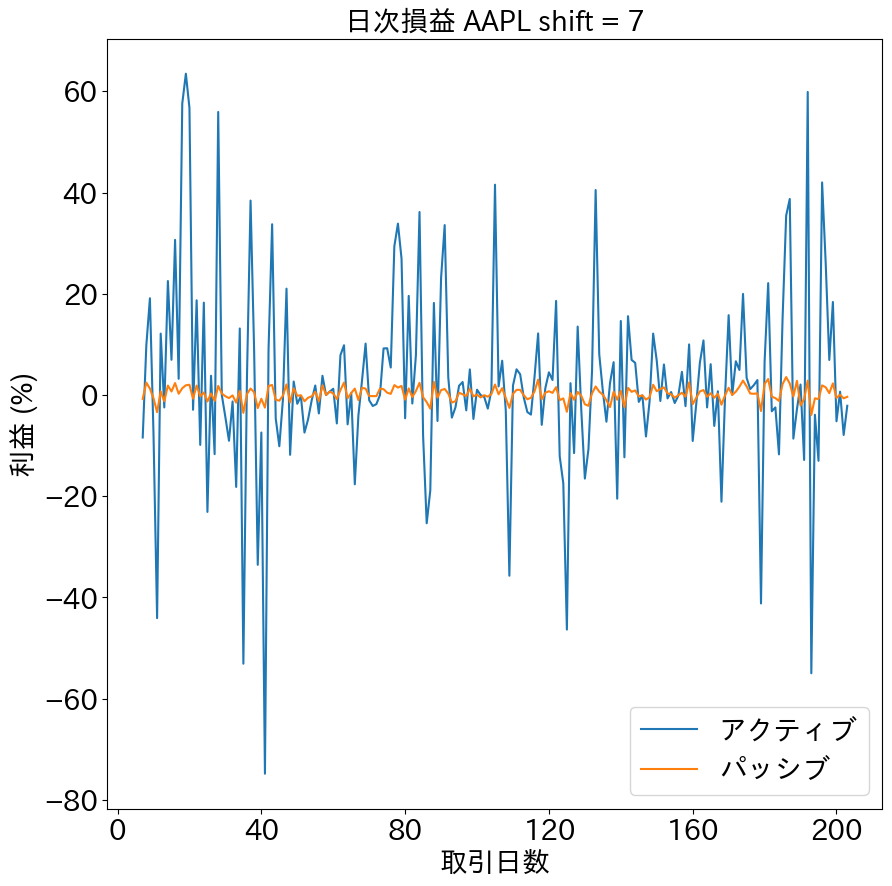

In [362]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(10, 10))

plt.xlabel("取引日数", fontsize=20) # x軸ラベル
plt.ylabel("利益 (%)", fontsize=20) # y軸ラベル

from matplotlib.ticker import MaxNLocator
plt.plot(100*df['strategy_returns'], label='アクティブ')
plt.plot(100*df['returns'], label='パッシブ')
plt.legend(fontsize=20)
plt.title("日次損益 " + tag + " shift = " + str(shift_number), fontsize=20)
plt.tick_params(axis='both', labelsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(6))
plt.savefig('AAPL-results/graphs/AAPL_daily_shift' + str(shift_number) + '.png')
#plt.savefig('graph/AAPL-shift-1.png')

In [363]:
res = pd.read_csv('AAPL-results/AAPL-backtesting-results.csv')

# Create a new row as a dictionary
new_row = {'Trading day shift': round(shift_number, 1), 
           'Net profit Active': round(100*net_profit_act, 2), 
           'Net profit Passive': round(100*net_profit_pas, 2), 
           'Sharpe Ratio': round(sharpe_ratio, 2), 
           'Maximum drawdown': round(100*max_drawdown, 2)}

# Append the new row to the dataframe
res = res.append(new_row, ignore_index=True)

# Save the dataframe back to the csv file
res.to_csv('AAPL-results/AAPL-backtesting-results.csv', index=False)

/var/folders/t7/hjhz46yx1zd6zs82rb7_q4jh0000gn/T/ipykernel_20464/854427743.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(new_row, ignore_index=True)


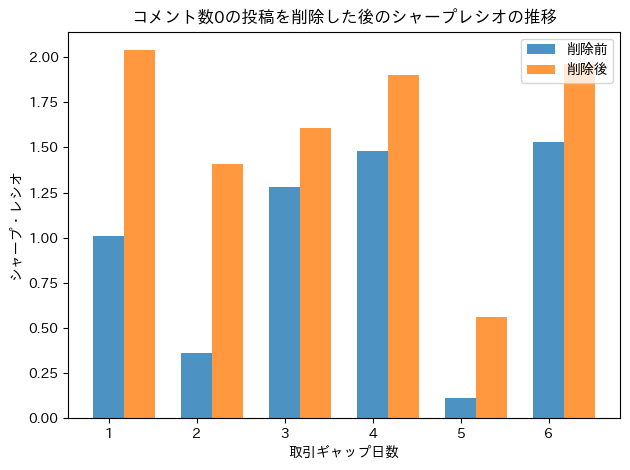

<Figure size 640x480 with 0 Axes>

In [372]:
import matplotlib.pyplot as plt
import japanize_matplotlib
# Define the data for the chart
before_deleting = [1.01, 0.36, 1.28, 1.48, 0.11, 1.53]
after_deleting = [2.04, 1.41, 1.61, 1.9, 0.56, 1.96]

# Create the plot
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, before_deleting, bar_width, alpha=opacity, label='削除前')
#rects2 = plt.bar(index + bar_width, after_deleting, bar_width, alpha=opacity, color='g', label='After deleting')
index = range(1, 7)
index_shifted = [x + bar_width for x in index]
rects2 = plt.bar(index_shifted, after_deleting, bar_width, alpha=opacity, label='削除後')
# Add labels and title
plt.xlabel('取引ギャップ日数')
plt.ylabel('シャープ・レシオ')
plt.title('コメント数0の投稿を削除した後のシャープレシオの推移')
#plt.xticks(index + int(bar_width) / 2, ('1', '2', '3', '4', '5', '6'))
plt.legend()

plt.tight_layout()
plt.show()

plt.savefig('AAPL-results-sharpe-change-after-no0comm.png')